In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
class ExpectationMaximization:
    def __init__(self, num_clusters, max_iterations=100, tolerance=1e-4):
        self.num_clusters = num_clusters
        self.max_iterations = max_iterations
        self.tolerance = tolerance

    def fit(self, X):
        self.X = X
        self.num_samples, self.num_features = X.shape

        # Initialize cluster means and covariances randomly
        self.cluster_means = np.random.rand(self.num_clusters, self.num_features)
        self.cluster_covariances = np.array([np.eye(self.num_features)] * self.num_clusters)
        self.cluster_weights = np.ones(self.num_clusters) / self.num_clusters

        # EM algorithm
        for _ in range(self.max_iterations):
            # E-step: Compute responsibilities
            responsibilities = self.compute_responsibilities()

            # M-step: Update parameters
            self.update_parameters(responsibilities)

        # Plot data and cluster means
        self.plot_data_and_means()


    def compute_responsibilities(self):
        responsibilities = np.zeros((self.num_samples, self.num_clusters))

        for i in range(self.num_samples):
            for k in range(self.num_clusters):
                # Compute the posterior probability of sample i belonging to cluster k
                responsibilities[i, k] = self.cluster_weights[k] * self.compute_likelihood(self.X[i], self.cluster_means[k], self.cluster_covariances[k])

            # Normalize responsibilities
            responsibilities[i] /= np.sum(responsibilities[i])

        return responsibilities

    def compute_likelihood(self, x, mean, covariance):
        det = np.linalg.det(covariance)
        inv = np.linalg.inv(covariance)
        exponent = -0.5 * np.dot(np.dot((x - mean).T, inv), (x - mean))
        return (1.0 / np.sqrt((2 * np.pi) ** self.num_features * det)) * np.exp(exponent)

    def update_parameters(self, responsibilities):
        # Update cluster weights
        self.cluster_weights = np.mean(responsibilities, axis=0)

        # Update cluster means
        self.cluster_means = np.dot(responsibilities.T, self.X) / np.sum(responsibilities, axis=0)[:, np.newaxis]

        # Update cluster covariances
        for k in range(self.num_clusters):
            weighted_sum = np.zeros((self.num_features, self.num_features))
            for i in range(self.num_samples):
                diff = self.X[i] - self.cluster_means[k]
                weighted_sum += responsibilities[i, k] * np.outer(diff, diff)
            self.cluster_covariances[k] = weighted_sum / np.sum(responsibilities[:, k])

        return self.cluster_means, self.cluster_covariances, self.cluster_weights
    
    
    def plot_data_and_means(self):
        plt.figure(figsize=(8, 6))
        plt.scatter(self.X[:, 0], self.X[:, 1], alpha=0.5, label='Data Points')
        plt.scatter(self.cluster_means[:, 0], self.cluster_means[:, 1], c='red', marker='x', label='Cluster Means')
        plt.title('Data Points and Cluster Means')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.grid(True)
        plt.show()



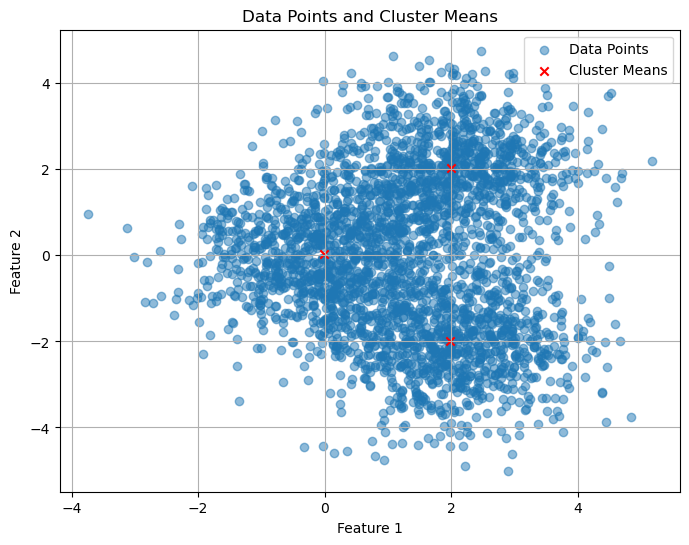

Cluster means:
[[ 2.00465739  2.03180798]
 [ 1.98848904 -1.9847225 ]
 [-0.00991329  0.03640391]]

Cluster covariances:
[[[ 0.94844151 -0.02495229]
  [-0.02495229  0.93362612]]

 [[ 0.99957742 -0.03143629]
  [-0.03143629  1.00311605]]

 [[ 1.02613762  0.02695635]
  [ 0.02695635  0.99200769]]]

Cluster weights:
[0.32008964 0.33458584 0.34532452]


In [4]:
# Example usage:
# Instantiate EM algorithm with desired number of clusters
em = ExpectationMaximization(num_clusters=3)

# Generate sample data
np.random.seed(0)
num_samples = 1000
num_features = 2
X = np.random.randn(num_samples, num_features) + np.array([2, 2])
X = np.vstack((X, np.random.randn(num_samples, num_features)))
X = np.vstack((X, np.random.randn(num_samples, num_features) + np.array([2, -2])))

# Fit EM algorithm to the data
em.fit(X)

# Print cluster means, covariances, and weights
print("Cluster means:")
print(em.cluster_means)
print("\nCluster covariances:")
print(em.cluster_covariances)
print("\nCluster weights:")
print(em.cluster_weights)
